## Part 1 - Data Analysis and Bayes Nets

### 1) Data Visualization and Exploration

Importing the required libraries and checking for the python version.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3,5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import pandas as pd
import os
import cv2  # OpenCV Python library for computer vision

# to make this notebook's output stable across runs
np.random.seed(42)

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import random

Loading only the training set for Part 1 of the coursework

In [7]:
CW_DATASET_PATH = "CW_dataset"

def load_train_data(dataset_path=CW_DATASET_PATH):
    x_train_all_path = os.path.join(dataset_path, "x_train_all.csv")
    y_train_all_path = os.path.join(dataset_path, "y_train_all.csv")

    x_train_all = pd.read_csv(x_train_all_path)
    y_train_all = pd.read_csv(y_train_all_path)

    return x_train_all, y_train_all

In [8]:
x_train, y_train = load_train_data()

Analysing the dataset

In [9]:
#Checking the shape of the data
x_train.shape

(9690, 2304)

In [10]:
y_train.shape

(9690, 1)

In [11]:
#Displaying the first 5 rows of the dataset
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [12]:
y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [13]:
#Checking for missing values
x_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           0      1      2      3      4      5      6      7      8      9  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  False  False  False  False  False  False  False  False  False  False   
9686  False  False  False  False  False  False  False  False  False  False   
9687  False  False  False  False  False  False  False  False  False  False   
9688  False  False  False  False  False  False  False  False  False  False   
9689  False  False  False  False  False  False  False  False  False  False   

 

In [14]:
y_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           0
0     False
1     False
2     False
3     False
4     False
...     ...
9685  False
9686  False
9687  False
9688  False
9689  False

[9690 rows x 1 columns]>

In [15]:
#To check if there are any missing values in the data frame
x_train.isna().any().any()

False

In [16]:
y_train.isna().any().any()

False

In [17]:
# Get a summary of the dataset using describe
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [18]:
y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [19]:
label_counts = y_train['0'].value_counts().sort_index()
label_counts

0
0     210
1    2220
2    2250
3    1410
4    1980
5     210
6     360
7     240
8     540
9     270
Name: count, dtype: int64

Visualising the dataset using graphs

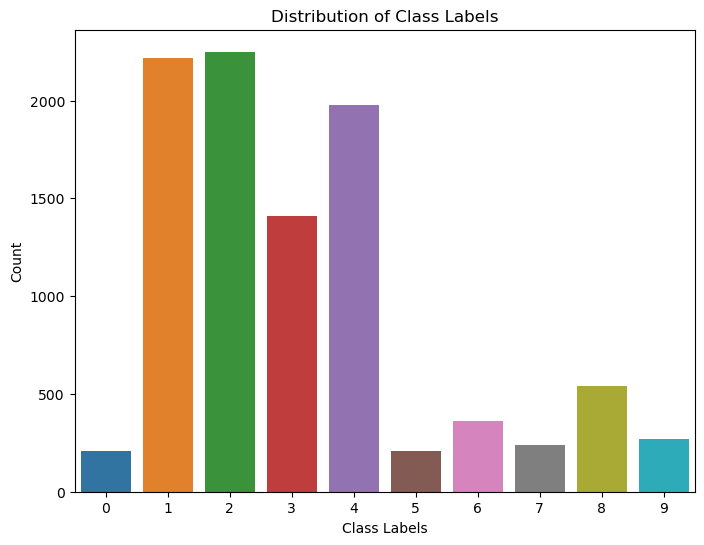

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='0', data=y_train)
plt.title("Distribution of Class Labels")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

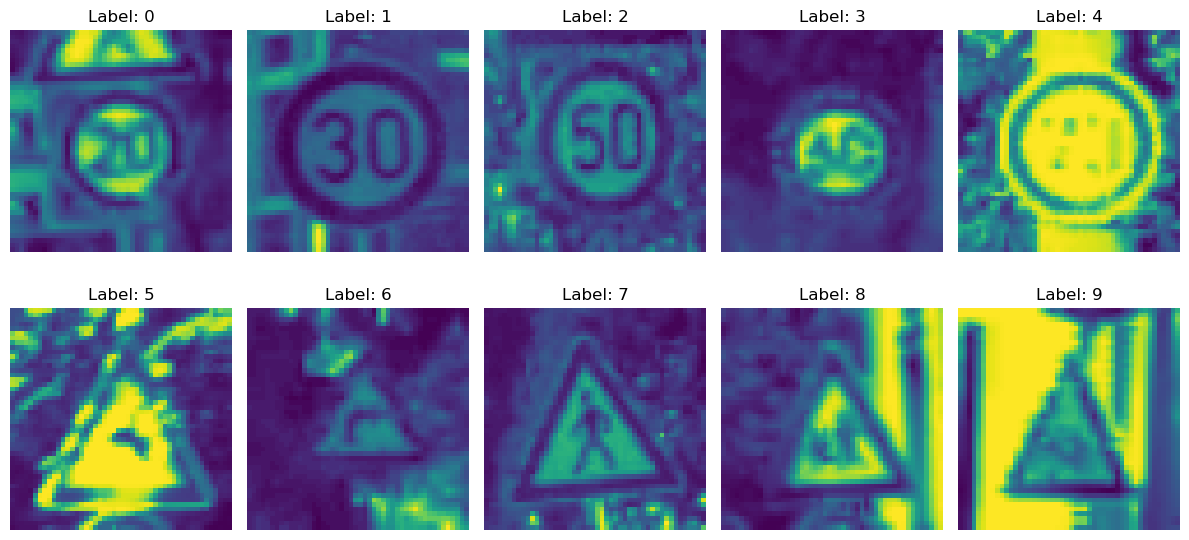

In [21]:
# To display one image for each label

# Initialize a dictionary to store one image for each label
label_images = {}

# Iterate through the rows of the DataFrames and find one image for each label
for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]  
    
    if label not in label_images:
        # Store the first image for each unique label
        label_images[label] = row.values.reshape(48, 48)  
    
    # Break the loop if we have found one image for each unique label
    if len(label_images) == 10:
        break

# Display the images
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i, (label, image) in enumerate(label_images.items()):
    r, c = divmod(i, 5)
    axs[r, c].imshow(image)
    axs[r, c].set_title(f'Label: {label}')
    axs[r, c].axis('off')

plt.tight_layout()
plt.show()

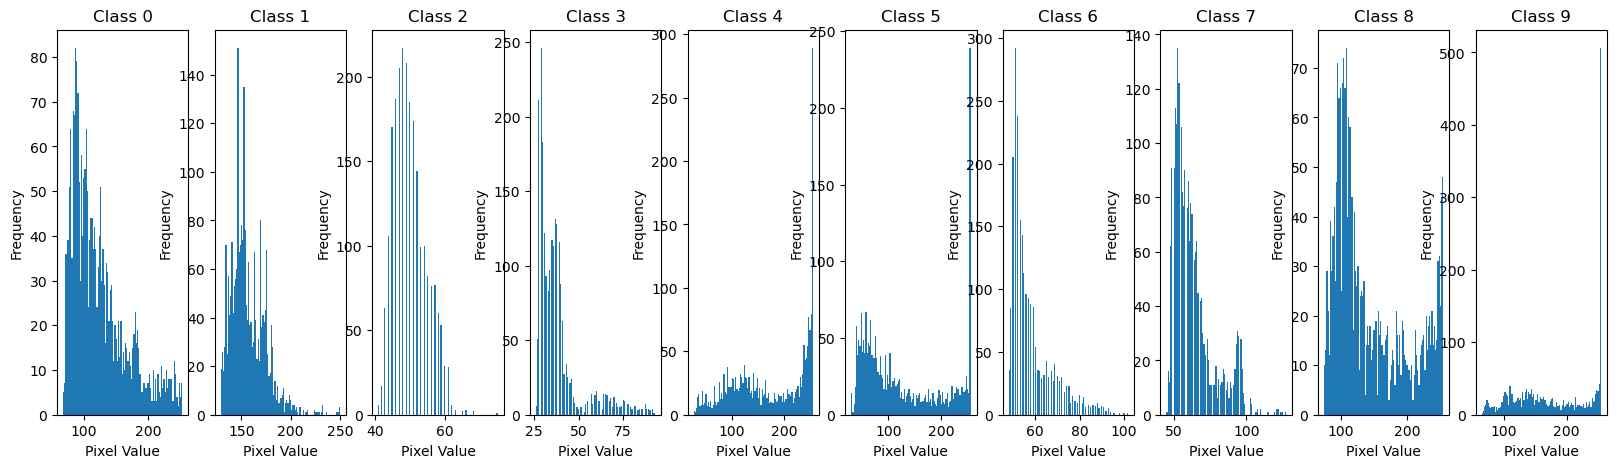

In [22]:
import matplotlib.pyplot as plt

unique_class_labels = y_train['0'].unique()

fig, axes = plt.subplots(1, len(unique_class_labels), figsize=(20, 5))

for i, class_label in enumerate(unique_class_labels):
    # Select an image for each class
    class_images = x_train[y_train['0'] == class_label]
    
    if not class_images.empty:
        img = class_images.iloc[0, :-1].values
        
        # Plot the histogram for the image of each class
        axes[i].hist(img, bins=100)
        axes[i].set_title(f'Class {class_label}')
        axes[i].set_xlabel("Pixel Value")
        axes[i].set_ylabel("Frequency")

plt.show()


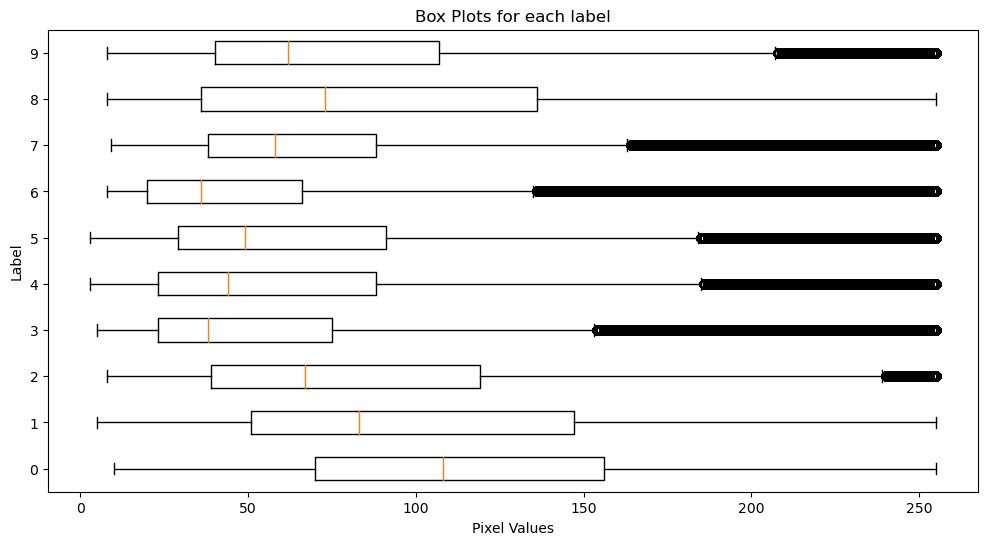

Label 0: 210 images
Label 1: 2220 images
Label 2: 2250 images
Label 3: 1410 images
Label 4: 1980 images
Label 5: 210 images
Label 6: 360 images
Label 7: 240 images
Label 8: 540 images
Label 9: 270 images


In [41]:
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)

# store image data for each label
label_images = {}

# just to check if all images are being plotted
num_images_per_label = {}

for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]  
    image_data = row.values.reshape(-1, 48, 48) 

    if label not in label_images:
        label_images[label] = []
    
    # add image data to associated labels
    label_images[label].append(image_data)

    # just to check if all images are being plotted
    num_images_per_label[label] = len(label_images[label])

# get numpy array from dictionary values (image data)
box_data = np.array(list(label_images.values()), dtype=object)

# labels from keys
labels = list(label_images.keys())

# box plots for each label 
plt.figure(figsize=(12, 6))
plt.boxplot(box_data, labels=labels, vert=False)
plt.title("Box Plots for each label")
plt.xlabel("Pixel Values")
plt.ylabel("Label")
plt.show()


# just to check if all images are being plotted
for label, num_images in num_images_per_label.items():
    print(f"Label {label}: {num_images} images")

### 2) Preprocessing

To be completed

### 3) Running Naïve Bayes Classifier on Train Dataset

In [24]:

from sklearn.naive_bayes import GaussianNB

x_train = np.asarray(x_train)
train_images = x_train.reshape(x_train.shape[0], -1)
y_train = np.asarray(y_train).ravel()
clf = GaussianNB()
clf.fit(train_images, y_train)

predictions = clf.predict(x_train)

"""
#Using the stratified train test split to split the data into train and test sets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
train_images = train_images.reshape(train_images.shape[0], -1)
X_train, X_test, Y_train, Y_test = train_test_split(train_images,y_train,test_size=0.33, random_state=42)
clf2 = GaussianNB()
clf2.fit(X_train, Y_train)
predictions2 = clf2.predict(X_test)
"""

'\n#Using the stratified train test split to split the data into train and test sets\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.model_selection import train_test_split\ntrain_images = train_images.reshape(train_images.shape[0], -1)\nX_train, X_test, Y_train, Y_test = train_test_split(train_images,y_train,test_size=0.33, random_state=42)\nclf2 = GaussianNB()\nclf2.fit(X_train, Y_train)\npredictions2 = clf2.predict(X_test)\n'

### 4) Evaluation Metrics for the Naïve Bayes Classifier on Dataset

In [25]:
from sklearn.metrics import classification_report

report = classification_report(y_train, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.15      0.73      0.25       210
           1       0.41      0.21      0.28      2220
           2       0.43      0.17      0.24      2250
           3       0.44      0.22      0.29      1410
           4       0.39      0.15      0.22      1980
           5       0.13      0.21      0.16       210
           6       0.08      0.67      0.15       360
           7       0.09      0.54      0.15       240
           8       0.67      0.25      0.36       540
           9       0.25      0.27      0.26       270

    accuracy                           0.23      9690
   macro avg       0.30      0.34      0.24      9690
weighted avg       0.39      0.23      0.25      9690



In [26]:
from sklearn.metrics import accuracy_score

# accuracy
accuracy = accuracy_score(y_train, predictions)
print('Accuracy = ', accuracy)

Accuracy =  0.23034055727554179


In [27]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_train, predictions)
confusion_matrix

array([[154,   5,  18,  12,   4,   0,   0,  17,   0,   0],
       [560, 473, 252,  78, 133,  53, 342, 289,  17,  23],
       [138, 373, 378, 178, 259,  99, 378, 387,   0,  60],
       [ 59,  58,  16, 310,  46,  44, 757,  67,  26,  27],
       [ 63, 205, 178, 113, 293,  75, 883, 151,   0,  19],
       [ 10,   2,   2,   0,   0,  44,  60,  79,  11,   2],
       [  0,  10,   0,   2,   0,   4, 241,  51,   4,  48],
       [  3,   1,   5,  16,   0,   0,  65, 130,   2,  18],
       [ 13,  31,  36,   0,   0,  29, 123, 148, 135,  25],
       [  0,   8,   0,   2,   7,   3,  20, 148,   8,  74]], dtype=int64)

In [28]:
tp = confusion_matrix.diagonal()
fn = np.sum(confusion_matrix, axis=1) - tp
fp = np.sum(confusion_matrix, axis=0) - tp
tn = np.sum(confusion_matrix) - (tp + fn + fp)

# TP Rate (Sensitivity or Recall)
tp_rate = tp / (tp + fn)

# FP Rate
fp_rate = fp / (fp + tn)

for class_label, tp, fp in zip(range(len(tp_rate)), tp_rate, fp_rate):
    print(f"Class {class_label}: \nTP Rate = {tp}, \nFP Rate = {fp}")

Class 0: 
TP Rate = 0.7333333333333333, 
FP Rate = 0.08924050632911393
Class 1: 
TP Rate = 0.21306306306306305, 
FP Rate = 0.0927710843373494
Class 2: 
TP Rate = 0.168, 
FP Rate = 0.06814516129032258
Class 3: 
TP Rate = 0.2198581560283688, 
FP Rate = 0.04842995169082125
Class 4: 
TP Rate = 0.147979797979798, 
FP Rate = 0.058236057068741895
Class 5: 
TP Rate = 0.20952380952380953, 
FP Rate = 0.03238396624472574
Class 6: 
TP Rate = 0.6694444444444444, 
FP Rate = 0.28167202572347266
Class 7: 
TP Rate = 0.5416666666666666, 
FP Rate = 0.14148148148148149
Class 8: 
TP Rate = 0.25, 
FP Rate = 0.007431693989071038
Class 9: 
TP Rate = 0.2740740740740741, 
FP Rate = 0.02356687898089172


In [29]:
specificity = []
unique_labels = np.unique(y_train)

for i in range(len(unique_labels)):
    true_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]) - np.sum(confusion_matrix[:, i]) + confusion_matrix[i, i]
    total_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :])
    print(f'Label {unique_labels[i]} specificity: {true_negative / total_negative}')

Label 0 specificity: 0.910759493670886
Label 1 specificity: 0.9072289156626506
Label 2 specificity: 0.9318548387096774
Label 3 specificity: 0.9515700483091788
Label 4 specificity: 0.9417639429312581
Label 5 specificity: 0.9676160337552743
Label 6 specificity: 0.7183279742765273
Label 7 specificity: 0.8585185185185186
Label 8 specificity: 0.9925683060109289
Label 9 specificity: 0.9764331210191083


In [30]:
from sklearn.metrics import recall_score

sensitivity = recall_score(y_train, predictions, average=None)
for i in range(len(unique_labels)):
    print(f'Label {unique_labels[i]} sensitivity: {sensitivity[i]}')

Label 0 sensitivity: 0.7333333333333333
Label 1 sensitivity: 0.21306306306306305
Label 2 sensitivity: 0.168
Label 3 sensitivity: 0.2198581560283688
Label 4 sensitivity: 0.147979797979798
Label 5 sensitivity: 0.20952380952380953
Label 6 sensitivity: 0.6694444444444444
Label 7 sensitivity: 0.5416666666666666
Label 8 sensitivity: 0.25
Label 9 sensitivity: 0.2740740740740741


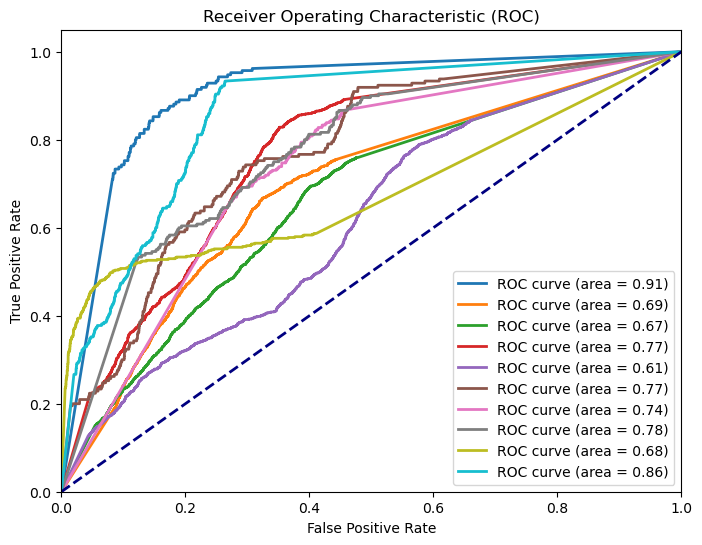

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities = clf.predict_proba(x_train)
roc_auc_scores = []
plt.figure(figsize=(8, 6))

for i in range(len(unique_labels)):
    fpr, tpr, _ = roc_curve((y_train == unique_labels[i]).astype(int), probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Evaluation Using Cross-Validation

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x_train, y_train, scoring="accuracy", cv=10)

In [33]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(scores)

Scores: [0.23323013 0.21052632 0.24355005 0.19298246 0.17027864 0.10216718
 0.14757482 0.25696594 0.11455108 0.19401445]
Mean: 0.1865841073271414
Standard deviation: 0.05014630428306487


In [34]:
scores = cross_val_score(clf, x_train, y_train, scoring="neg_mean_squared_error", cv=10)

clf_rmse_scores = np.sqrt(-scores)

display_scores(clf_rmse_scores)

Scores: [2.80644989 2.9619186  2.60625587 2.50366089 2.53947168 3.23997223
 2.99569695 3.07558715 3.01629561 2.94724863]
Mean: 2.8692557504560754
Standard deviation: 0.23405371006915723


### 5) Top Correlating Features - Feature Selection

In [35]:
#from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Define the number of features to select for each class
no_of_features_per_class = [5, 10, 20]

# Create a dictionary to store the top features for each class and each dataset
top_features_per_cd = {}

x_train_class_vs_rest = pd.DataFrame(x_train)

# Load the training features and labels for each one-vs-rest classification task
for class_label in range(10):  # Assuming there are 10 classes
    # Load the corresponding labels (0 for the current class, 1 for the rest)
    onevrsall_path = os.path.join("OnevrsAll", f"{class_label}_vrs_all")
    y_train_path = os.path.join(onevrsall_path, f"y_train_{class_label}.csv")
    y_train_class_vs_rest = pd.read_csv(y_train_path)
    
    # Create a dictionary to store the top features for the current class
    top_features_per_class = {}
    
    # Train a logistic regression classifier for the current one-vs-rest classification task
    classifier = OneVsRestClassifier(SVC(kernel='linear'))
    classifier.fit(x_train_class_vs_rest, y_train_class_vs_rest)
    
    # Get the coefficients (weights) for the features
    feature_weights = classifier.estimators_[0].coef_[0]
    # Sort the features by their absolute weights and select the top features
    for no_f in no_of_features_per_class:
        top_feature_indices = np.argsort(np.abs(feature_weights))[::-1][:no_f]
        top_features = x_train_class_vs_rest.columns[top_feature_indices]
        top_features_per_class[no_f] = top_features.tolist()
    
    # Store the top features for the current class
    top_features_per_cd[class_label] = top_features_per_class

# Create the final datasets with selected features
final_datasets = {}
for no_f in no_of_features_per_class:
    dataset_name = f"Data set {no_f}"
    
    # Combine selected features for all classes
    selected_features = []
    for class_label, top_features in top_features_per_cd.items():
        selected_features.extend(top_features[no_f])
    
    # Create the final dataset with selected features
    final_datasets[dataset_name] = x_train_class_vs_rest[selected_features]

In [38]:
dataset1 = final_datasets['Data set 5']
dataset2 = final_datasets['Data set 10']
dataset3 = final_datasets['Data set 20']

In [37]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np

class_labels = list(range(10))

def evaluate_multinomial_nb(X_train, y_train):
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    roc_auc = roc_auc_score(y_train, y_pred)
    cross_val_scores = cross_val_score(nb_model, X_train, y_train, scoring="accuracy", cv=10)
    return accuracy, precision, recall, f1, roc_auc, cross_val_scores

datasets = [dataset1, dataset2, dataset3]  
y_train_dict = {}
evaluation_metrics = []
dataset_number_features = [5, 10, 20]

for dataset_number, dataset in enumerate(datasets):
    X_train_fr = dataset
    
    for class_label in class_labels:
        onevrsall_path = os.path.join("OnevrsAll", f"{class_label}_vrs_all")
        y_train_file = os.path.join(onevrsall_path, f"y_train_{class_label}.csv")
        y_train_df = pd.read_csv(y_train_file).values.ravel()
    
        accuracy, precision, recall, f1, roc_auc, cross_val_scores = evaluate_multinomial_nb(X_train_fr, y_train_df)

        evaluation_metrics.append({
            "Dataset": str(dataset_number_features[dataset_number]),
            "Class Label": class_label,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc,
            "Cross Val Scores": np.mean(cross_val_scores) 
        })

df_evaluation_metrics = pd.DataFrame(evaluation_metrics)

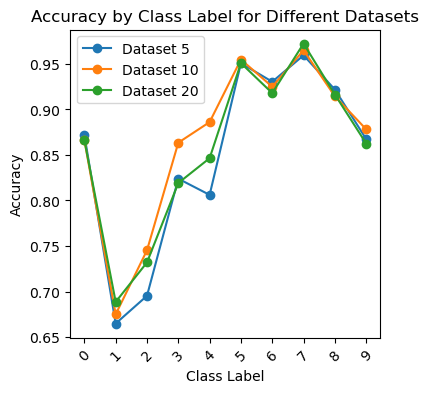

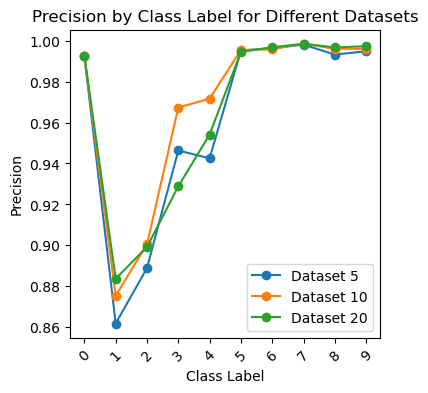

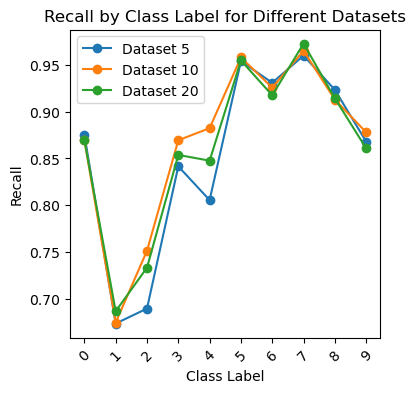

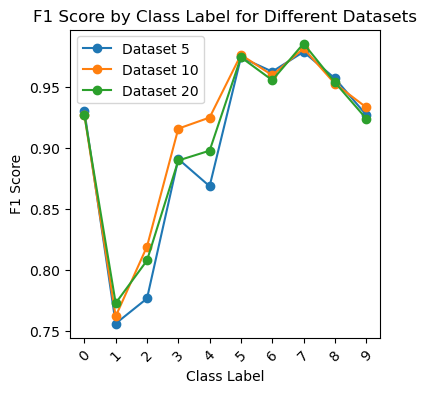

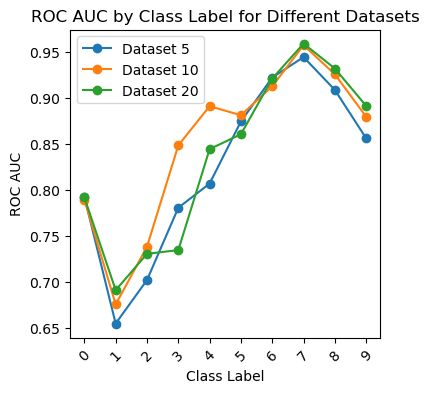

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

for metric in metrics:
    plt.figure(figsize=(4, 4)) 
    for dataset_number in [5, 10, 20]:
        dataset_metrics = df_evaluation_metrics[df_evaluation_metrics['Dataset'] == str(dataset_number)]
        x_values = dataset_metrics['Class Label']
        y_values = dataset_metrics[metric]
        plt.plot(x_values, y_values, marker='o', label=f'Dataset {dataset_number}')

    plt.title(f'{metric} by Class Label for Different Datasets')
    plt.xlabel('Class Label')
    plt.ylabel(metric)
    plt.legend()
    plt.xticks(x_values)  
    plt.xticks(rotation=45)
    plt.show()


In [39]:
df_evaluation_metrics

,Dataset,Class Label,Accuracy,Precision,Recall,F1 Score,ROC AUC,Cross Val Scores
0,5,0,0.871827,0.992703,0.875422,0.930381,0.792473,0.859340
1,5,1,0.664912,0.861620,0.673494,0.756030,0.654765,0.647162
2,5,2,0.695356,0.888773,0.689516,0.776567,0.702091,0.588338
3,5,3,0.823839,0.946353,0.841546,0.890878,0.780702,0.786584
4,5,4,0.806089,0.942480,0.805447,0.868592,0.807017,0.763777
5,5,5,0.950568,0.995268,0.954008,0.974202,0.874623,0.945408
6,5,6,0.930237,0.996443,0.930868,0.962540,0.922379,0.919814
7,5,7,0.959236,0.998130,0.960000,0.978694,0.944583,0.954592
8,5,8,0.921672,0.993298,0.923279,0.957009,0.908862,0.911558
9,5,9,0.867286,0.994889,0.867941,0.927089,0.856192,0.853354
